In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [3]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distances(self, x_test_i):
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indexes]

        if self.regression:
            return np.mean(targets)
        else:
            return np.bincount(targets).argmax()

    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])


In [5]:
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Lets check how k parametr changes metric

In [9]:
k_values = [1, 3, 5, 7, 9, 15]
for k in k_values:
    knn = KNearestNeighbors(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy for {k} neighbors is {accuracy_score(y_test,y_pred)}")

Accuracy for 1 neighbors is 0.9333333333333333
Accuracy for 3 neighbors is 0.9555555555555556
Accuracy for 5 neighbors is 0.9777777777777777
Accuracy for 7 neighbors is 0.9555555555555556
Accuracy for 9 neighbors is 0.9555555555555556
Accuracy for 15 neighbors is 0.9555555555555556


We see that small values of k give lower accuracy, while increasing k improves performance up to a certain point. However, very large k values also reduce accuracy. For this dataset, k = 5 gives the best result and represents a balance between underfitting and overfitting. This experiment shows the importance of choosing an appropriate k.

# Feature scaling

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNearestNeighbors(n_neighbors = 5)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict(X_test_scaled)
print(f"Accuracy for {5} neighbors is {accuracy_score(y_test,y_pred)} with scaled features")

Accuracy for 5 neighbors is 0.9111111111111111 with scaled features


In [13]:
knn = KNearestNeighbors(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy for {5} neighbors is {accuracy_score(y_test,y_pred)} without scaled features")

Accuracy for 5 neighbors is 0.9777777777777777 without scaled features


Surprisingly, feature scaling led to a slight decrease in accuracy.
This can be explained by the fact that the Iris dataset contains features already measured on comparable scales, and kNN without scaling may benefit from the naturally dominant features.

# Comparison with sklearn KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_sk= KNeighborsClassifier(n_neighbors=5)
knn_our = KNearestNeighbors(n_neighbors = 5)
knn_sk.fit(X_train,y_train)
knn_our.fit(X_train,y_train)
y_pred_sk= knn_sk.predict(X_test)
y_pred_our = knn_our.predict(X_test)
print(f"Our knn accuracy:{accuracy_score(y_test,y_pred_sk)}")
print(f"Sklearn knn accuracy:{accuracy_score(y_test,y_pred_our)}")

Our knn accuracy:0.9777777777777777
Sklearn knn accuracy:0.9777777777777777


The scratch implementation achieves comparable accuracy to sklearn.

# Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_our)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

# Lets see how it classified visually

In [30]:
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name = f"feature {feature_indexes[0]}"
    feature2_name = f"feature {feature_indexes[1]}"

    X_feature_columns = X[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]

    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)


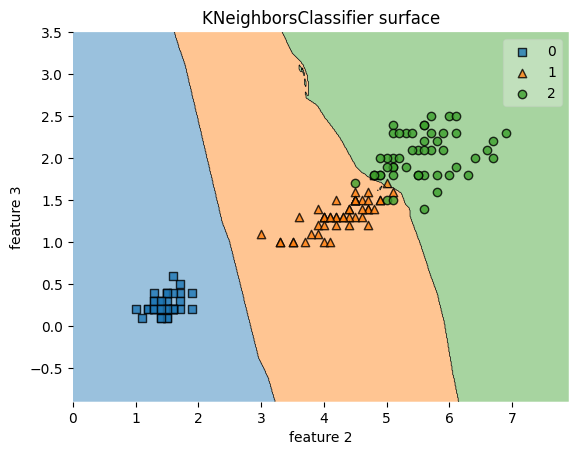

In [31]:
feature_indexes = [2, 3]
title1 = 'KNeighborsClassifier surface'
decision_boundary_plot(X, y, X_train, y_train, knn_our, feature_indexes, title1)

So, visually, we see that for squares the model works well; for triangles and circles the decision boundary is not totally clear, but the performance is still good.